<a href="https://colab.research.google.com/github/vinit-narula/TensorFlow/blob/main/NLP_Tweaking_the_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tweaking the model: Word Embeddings and Sentiment

In [2]:
# Import TensorFlow and related functions
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
!wget --no-check-certificate \
    -O /tmp/sentiment.csv https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P

--2021-03-21 12:31:09--  https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving drive.google.com (drive.google.com)... 74.125.20.113, 74.125.20.101, 74.125.20.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.20.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/c3hj5r4qgu42a6870m08dnv6m4s3f4o8/1616329800000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P [following]
--2021-03-21 12:31:10--  https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/c3hj5r4qgu42a6870m08dnv6m4s3f4o8/1616329800000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)... 74.125.199.132, 2607:f8b0:400e:c02::84
Connecting to doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)|74.125.199

In [4]:
# Get the dataset
import numpy as np
import pandas as pd

dataset = pd.read_csv('/tmp/sentiment.csv')

#converting text column into list
sentences = dataset['text'].tolist() 
#converting sentiment column into list 
labels = dataset['sentiment'].tolist()

# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]    

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [5]:
# Tokenize the dataset
# changed vocab_size to 500 from 1000
# changed max_length to 50 from 100

vocab_size = 500
embedding_dim = 16
max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# import tokenizer and pad sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
# print(word_index)

# for training sentences
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type, 
                       truncating=trunc_type)
# for testing sentences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=trunc_type)

In [6]:
#Review a Sequence
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

good case excellent value ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
Good case Excellent value.


In [7]:
# We'll use a slightly different model here, using GlobalAveragePooling1D instead of Flatten().

#Build and compile a Basic Sentiment Model with Embeddings

# Build a basic sentiment network
# Note the embedding layer is first, 
# and the output is only 1 node as it is either 0 or 1 (negative or positive)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            8000      
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 102       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 8,109
Trainable params: 8,109
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Train the model
# num_epochs changed to 30 from 10
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
50/50 [==============================] - 0s 5ms/step - loss: 0.1307 - accuracy: 0.9492 - val_loss: 0.8046 - val_accuracy: 0.7293
Epoch 2/50
50/50 [==============================] - 0s 4ms/step - loss: 0.1305 - accuracy: 0.9510 - val_loss: 0.8269 - val_accuracy: 0.7218
Epoch 3/50
50/50 [==============================] - 0s 4ms/step - loss: 0.1321 - accuracy: 0.9435 - val_loss: 0.8215 - val_accuracy: 0.7268
Epoch 4/50
50/50 [==============================] - 0s 4ms/step - loss: 0.1285 - accuracy: 0.9523 - val_loss: 0.8289 - val_accuracy: 0.7268
Epoch 5/50
50/50 [==============================] - 0s 4ms/step - loss: 0.1299 - accuracy: 0.9460 - val_loss: 0.7847 - val_accuracy: 0.7393
Epoch 6/50
50/50 [==============================] - 0s 4ms/step - loss: 0.1271 - accuracy: 0.9523 - val_loss: 0.8122 - val_accuracy: 0.7318
Epoch 7/50
50/50 [==============================] - 0s 4ms/step - loss: 0.1252 - accuracy: 0.9504 - val_loss: 0.8322 - val_accuracy: 0.7293
Epoch 8/50
50/50 [==

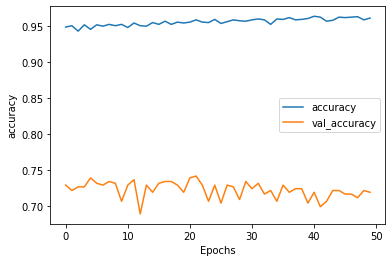

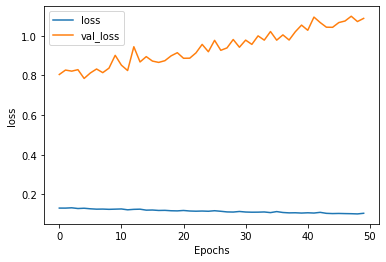

In [15]:
# Visualize the training graph
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [16]:
# Get files for visualizing the network
# The code below will download two files for visualizing how your network "sees" the sentiment related to each word. 
# Head to http://projector.tensorflow.org/ and load these files, then click the "Sphereize" checkbox.

# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(500, 16)


In [18]:
import io

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [19]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
# Predicting Sentiment in New Reviews

# Use the model to predict a review   
fake_reviews = ['I love this phone', 'I hate spaghetti', 
                'Everything was cold',
                'Everything was hot exactly as I wanted', 
                'Everything was green', 
                'the host seated us immediately',
                'they gave us free chocolate cake', 
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes', 
                'does not work when I stand on my head',
                'the movies is good',
                'the movies is not good',
                'the movies is bad',
                'the movies is ok',
                'the movies is not ok',
                'life is good']

print(fake_reviews) 

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)           

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')              

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_reviews)):
  print(fake_reviews[x])
  print(classes[x])
  print('\n')

# Try adding reviews of your own
# Add some negative words (such as "not") to the good reviews and see what happens
# For example:
# they gave us free chocolate cake and did not charge us

['I love this phone', 'I hate spaghetti', 'Everything was cold', 'Everything was hot exactly as I wanted', 'Everything was green', 'the host seated us immediately', 'they gave us free chocolate cake', 'not sure about the wilted flowers on the table', 'only works when I stand on tippy toes', 'does not work when I stand on my head', 'the movies is good', 'the movies is not good', 'the movies is bad', 'the movies is ok', 'the movies is not ok', 'life is good']

HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!

I love this phone
[0.9995426]


I hate spaghetti
[0.00101207]


Everything was cold
[0.7151847]


Everything was hot exactly as I wanted
[0.3655419]


Everything was green
[0.7151847]


the host seated us immediately
[0.9940725]


they gave us free chocolate cake
[0.9997539]


not sure about the wilted flowers on the table
[0.00074465]


only works when I stand on tippy toes
[0.99868315]


does not work when I stand on my head
[0.00021333]


the movies is g